In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
model = AbstractModel()
model.N = Param(mutable=True, default=3)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)
model.U = Var(model.i,model.j, within=Binary, initialize=0)
def Coverall_rule(model,i,j):
    totalQueenDiag = sum(model.U[c,r] if (abs(j-c)==abs(i-r) or i==r  or j==c)  else 0 for r in model.i for c in model.j)
    return totalQueenDiag>=1
model.Coverall= Constraint(model.i,model.j, rule=Coverall_rule)
def Crow_rule(model,i):
    return sum(model.U[i,j] for j in model.j)<=1
model.Crow = Constraint(model.i, rule=Crow_rule)
def Ccol_rule(model,j):
    return sum(model.U[i,j] for i in model.i)<=1
model.Ccol = Constraint(model.j, rule=Ccol_rule )
def Cdiag_rule1(model,i,j):
    totalQueen = model.U[i,j]+sum(model.U[c,r] if (j-c)==(i-r) else 0 for r in model.i for c in model.j)
    return totalQueen<=1
model.Cdiag1 = Constraint(model.i,model.j, rule=Cdiag_rule1 )
   
def Cdiag_rule2(model,i,j):
    totalQueen = sum(model.U[c,r] if (j-c==r-i) else 0 for r in model.i for c in model.j)
    return totalQueen<=1
model.Cdiag2 = Constraint(model.i,model.j, rule=Cdiag_rule2 )

def Obj_rule(model):
    return sum(model.U[i,j] for i in model.i for j in model.j)    
model.obj = Objective(rule=Obj_rule, sense=minimize)
opt = SolverFactory('glpk')



In [3]:
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance

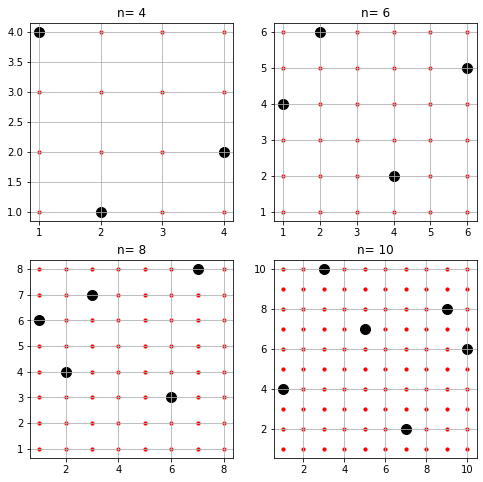

In [4]:
fig = plt.figure(figsize=(8,8))
for counter in range(2,6):
    ax1=plt.subplot(2, 2, counter-1)
    n=counter*2
    model.N=n
    ax1.set_title('n= '+ str(n))
    instance = model.create_instance()
    results = opt.solve(instance) # solves and updates instance
    for i in instance.i:
        for j in instance.j:
            X=value(instance.U[i,j])
            if X==1:
                plt.scatter( i,j,s=100,color='black')
            else:
                plt.scatter( i,j,s=10,color='red')
    #plt.ticks('off')
    plt.grid(True)
plt.show()

In [5]:
fig.savefig('GMinNQueen.png', format='png', dpi=1200)